# Member Referrals analysis

The CEO has come to your desk and explained that we want to increase signups from *our 
referral scheme*. As part of this effort, we are keen to understand at what point in the 
member lifecycle members refer other people. There are 2 CSV files 
that contain information on customers and their referral behaviour: 
 
● The Customer Info CSV contains information on customers and metadata for each 
customer. It is a representative sample of the whole customer database 
 
● The Referral Info CSV is a log of sign-ups we have received from the referral 
channel 
 
Use this information to answer the questions below: 
 
1. When do members refer?  
(Try to think about each member lifetime, starting from when they sign-up to Bulb. 
The number of Bulb members is growing very quickly. A lot of Bulb members have not been with 
Bulb for very long. Think about how this might affect your conclusions.) 
 
2. Does the channel members are acquired from significantly impact how they refer? Do 
you think we need a larger sample size to be sure? 
 
3. We can send an email to members to invite them to refer their friends. We can choose 
when, and to whom, we send the emails. How would you suggest we proceed? 


In [2]:
#Let's load the data that we have first
import pandas as pd

customer_info = pd.read_csv('data/180601_Customer_Info.csv')
referral_info = pd.read_csv('data/180601_Referrals_Info.csv')

In [3]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1699 non-null   int64 
 1   sign_up_date     1699 non-null   object
 2   sign_up_channel  1699 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.9+ KB


In [4]:
customer_info.sample(5)

,customer_id,sign_up_date,sign_up_channel
1345,1866,2021-04-04,Price Comparison Website
1235,39,2020-08-08,Bulb Website
949,2147,2021-01-22,Price Comparison Website
1182,2724,2021-12-18,Referral
674,2194,2021-03-08,Price Comparison Website


In [5]:
referral_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   referral_date         1000 non-null   object
 1   referrer_customer_id  1000 non-null   int64 
 2   sign_up_customer_id   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [6]:
referral_info.sample(5)

,referral_date,referrer_customer_id,sign_up_customer_id
21,2021-12-01,745,1710
107,2021-10-08,28,900
701,2021-08-22,6,1410
481,2021-07-23,398,1303
87,2021-04-14,631,1568


## Customer signup histogram

In [7]:
#set the date data as datetime in pandas
customer = customer_info.copy()
customer.sign_up_date = pd.to_datetime(customer.sign_up_date)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1699 non-null   int64         
 1   sign_up_date     1699 non-null   datetime64[ns]
 2   sign_up_channel  1699 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 39.9+ KB


In [8]:
#set the date data as datetime in pandas
referral = referral_info.copy()
referral.referral_date = pd.to_datetime(referral.referral_date)
referral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   referral_date         1000 non-null   datetime64[ns]
 1   referrer_customer_id  1000 non-null   int64         
 2   sign_up_customer_id   1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 23.6 KB


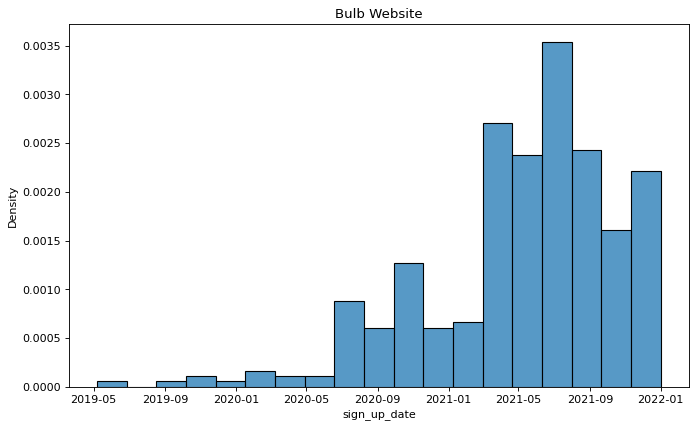

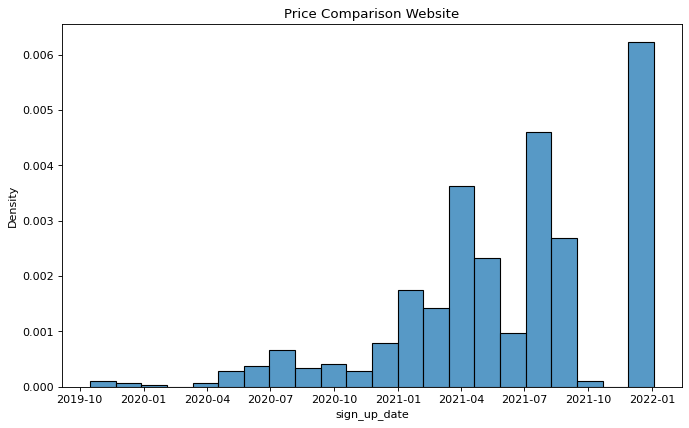

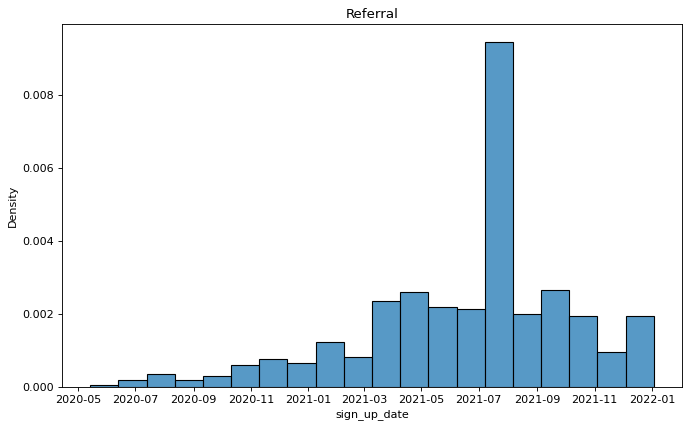

In [116]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

signup_channel = np.unique(customer.sign_up_channel)
for channel in signup_channel:
    plt.figure(figsize=(10, 6), dpi=80)
    plt.title(channel)
    sns.histplot(data=customer[customer.sign_up_channel==channel], x='sign_up_date', stat="density", common_norm=True)
    plt.show()

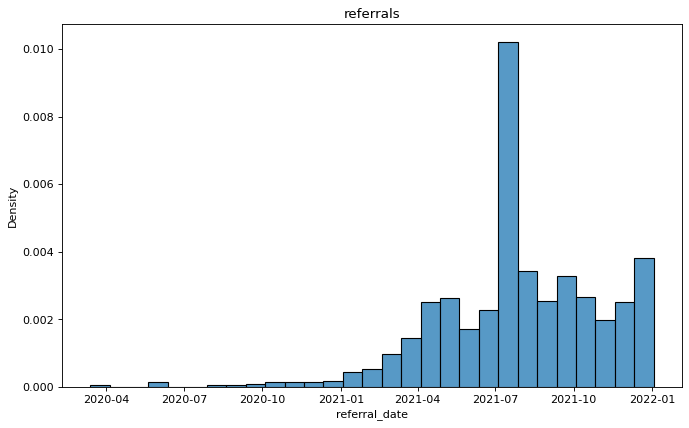

In [10]:
plt.figure(figsize=(10, 6), dpi=80)
plt.title('referrals')
sns.histplot(data=referral, x='referral_date', stat="density", common_norm=False)
plt.show()

- Looks like something interesting happened right after 2021-07, let's check what happened.
- We can also check how long does it take for a costumer to refer someone.

## How long does it take for a costumer to refer someone

In [14]:
referral['customer_id'] = referral.referrer_customer_id
merged_df = referral.merge(customer, on='customer_id', how='left')
#merged_df.drop('customer_id', inplace=True)
merged_df['days_until_referral'] = merged_df.referral_date - merged_df.sign_up_date
merged_df.sample(5)

,referral_date,referrer_customer_id,sign_up_customer_id,customer_id,sign_up_date,sign_up_channel,days_until_referral
644,2020-08-03,150,1025,150,2020-07-06,Bulb Website,28 days
461,2021-10-04,263,1150,263,2021-05-01,Price Comparison Website,156 days
470,2021-04-02,57,930,57,2020-10-25,Referral,159 days
266,2021-08-09,435,1345,435,NaT,NaN,NaT
528,2021-07-19,705,1655,705,2021-01-31,Bulb Website,169 days


In [38]:
# Amount of missing data that needs to be either changed or removed.
# Remove roughly 10% of the data (1000 data points)
merged_df.sign_up_date.isnull().sum()

170

In [36]:
merged_df.referral_date.isnull().sum()

0

In [46]:
filtered_df = merged_df[~merged_df.sign_up_date.isnull()]
filtered_df.sample(5)

,referral_date,referrer_customer_id,sign_up_customer_id,customer_id,sign_up_date,sign_up_channel,days_until_referral
355,2021-06-27,21,892,21,2021-02-27,Referral,120 days
763,2021-03-15,609,1545,609,2020-09-05,Price Comparison Website,191 days
731,2021-08-03,312,1205,312,2021-02-23,Referral,161 days
445,2021-04-11,165,1041,165,2021-04-02,Referral,9 days
58,2021-07-24,271,1158,271,2021-07-24,Referral,0 days


In [84]:
filtered_df[np.isfinite(filtered_df['days_until_referral'])]

,referral_date,referrer_customer_id,sign_up_customer_id,customer_id,sign_up_date,sign_up_channel,days_until_referral
0,2021-07-18,795,1771,795,2021-03-03,Price Comparison Website,137 days
1,2021-04-12,577,1510,577,2021-03-28,Price Comparison Website,15 days
2,2021-07-07,868,1858,868,2021-03-07,Bulb Website,122 days
3,2021-10-25,801,1778,801,2021-04-30,Referral,178 days
4,2021-08-15,690,1637,690,2021-07-29,Price Comparison Website,17 days
...,...,...,...,...,...,...,...
996,2021-07-17,448,1359,448,2021-05-27,Referral,51 days
997,2021-07-17,812,1789,812,2021-05-02,Price Comparison Website,76 days
998,2021-12-15,156,1031,156,2021-03-02,Bulb Website,288 days
999,2021-07-20,601,1537,601,2021-04-18,Bulb Website,93 days


In [47]:
filtered_df.describe()

,referrer_customer_id,sign_up_customer_id,customer_id,days_until_referral
count,832.000000,832.000000,832.000000,832
mean,380.856971,1353.899038,380.856971,113 days 15:41:32.307692308
std,265.374462,296.568764,265.374462,112 days 23:54:37.641742844
min,0.000000,260.000000,0.000000,0 days 00:00:00
25%,140.000000,1106.750000,140.000000,24 days 00:00:00
50%,355.500000,1352.500000,355.500000,83 days 12:00:00
75%,612.250000,1613.250000,612.250000,167 days 06:00:00
max,868.000000,1859.000000,868.000000,700 days 00:00:00


Users in average refer in 113 days. The first percentile (25%) of referral time since sign up is less than a month. The second percentile (50%) for referral is almost 3 months and the last percentile (75%) is 5-6 months. 

<AxesSubplot:xlabel='days_until_referral', ylabel='Count'>

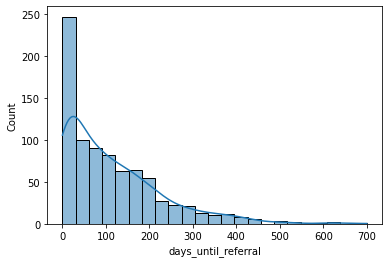

In [77]:
sns.histplot(filtered_df["days_until_referral"].dt.days, kde=True)

<AxesSubplot:xlabel='days_until_referral', ylabel='Count'>

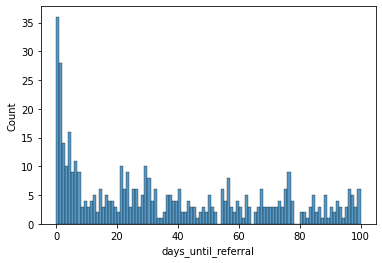

In [100]:
sns.histplot(filtered_df["days_until_referral"].dt.days, bins=np.linspace(0,100, 101))

1. **When do members refer?**
(Try to think about each member lifetime, starting from when they sign-up to Bulb. The number of Bulb members is growing very quickly. A lot of Bulb members have not been with Bulb for very long. Think about how this might affect your conclusions.)

From the previous plot, we can conclude that clients tend to use the referral system mostly right after signing up, being the most important the first week.

2. Does the channel members are acquired from significantly impact how they refer? Do you think we need a larger sample size to be sure?

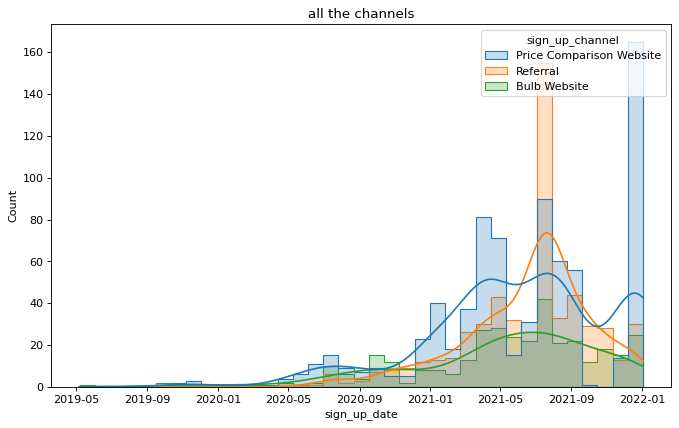

In [123]:
plt.figure(figsize=(10, 6), dpi=80)
plt.title('all the channels')
sns.histplot(data=customer, x='sign_up_date', hue='sign_up_channel', element="step", kde=True)
plt.show()

* Looks like customers have a tendency to sign up due to a price comparison websites, meanwhile the tendency of sign up due to referrals has had a tendency to decline. Nevertheless, the data is non-conclusive, more data need to be collected to have a full view of what is happening in the market.

* As for users that refer, depending how they sign up we have:

In [193]:
customers_former_signup = pd.DataFrame(filtered_df[['sign_up_channel', 'customer_id']].value_counts(), columns=['times_referred'])
customers_former_signup

times_referred
sign_up_channel          customer_id                
Bulb Website             8                        34
Referral                 6                        11
                         10                        9
                         36                        9
                         37                        8
...                                              ...
Price Comparison Website 391                       1
                         395                       1
                         397                       1
                         401                       1
Referral                 864                       1

[702 rows x 1 columns]

Customer 8 referred 34 times, which is by far greater than other customers.

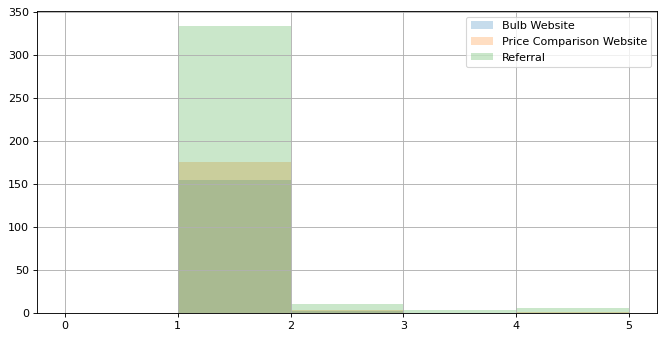

In [221]:
plt.figure(figsize=(10, 5), dpi=80)
customers_former_signup.loc[signup_channel[0]].times_referred.hist(bins=np.linspace(0,5,6), alpha = 0.25, label=signup_channel[0])
customers_former_signup.loc[signup_channel[1]].times_referred.hist(bins=np.linspace(0,5,6), alpha = 0.25, label=signup_channel[1])
customers_former_signup.loc[signup_channel[2]].times_referred.hist(bins=np.linspace(0,5,6), alpha = 0.25, label=signup_channel[2])
plt.legend(loc='best')
plt.show()

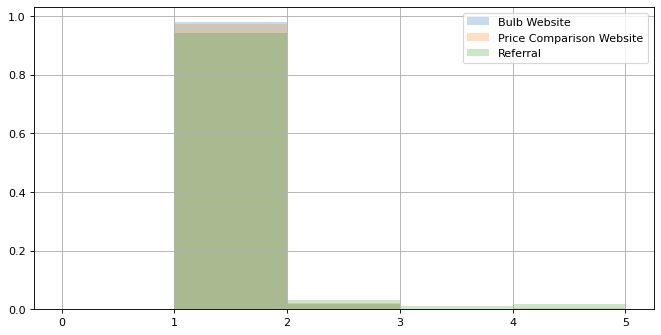

In [220]:
plt.figure(figsize=(10, 5), dpi=80)
customers_former_signup.loc[signup_channel[0]].times_referred.hist(bins=np.linspace(0,5,6), alpha = 0.25, density=True, label=signup_channel[0])
customers_former_signup.loc[signup_channel[1]].times_referred.hist(bins=np.linspace(0,5,6), alpha = 0.25, density=True, label=signup_channel[1])
customers_former_signup.loc[signup_channel[2]].times_referred.hist(bins=np.linspace(0,5,6), alpha = 0.25, density=True, label=signup_channel[2])
plt.legend(loc='best')
plt.show()

We have that customers that signed up from referrals have used the referral system the most. But in terms of the density of referrals compared with other channels the difference is very small, i.e., statistical non significant and therefore more data is needed to separate these classes.

3. We can send an email to members to invite them to refer their friends. We can choose when, and to whom, we send the emails. How would you suggest we proceed?

From the data that we have examined so far, we have that most people refer on the same day or the following day of their sign up. Therefore, we should advertise the referral system as part of the on-boarding process. The data also signals that customers use the referral system for a couple of months, therefore we can also send emails every month for the next six months to try to get as many people to sign-up as possible.